In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [52]:
n_neighbors = 50
random_state = 0

# # Load Digits dataset
# X, y = datasets.load_digits(return_X_y=True)

# # Split into train/test
# X_train, X_test, y_train, y_test = \
#     train_test_split(X, y, test_size=0.5, stratify=y,
#                      random_state=random_state)

# dim = len(X[0])


train = pd.read_csv('~/Box/DSCI303/archive/final_year_train.csv')
test = pd.read_csv('~/Box/DSCI303/archive/final_year_test.csv')

drop_columns = ['Unnamed: 0', 'Unnamed: 0.1', 'explicit', 'key', 'id', 'duration_ms', 'year',
                 'year_bins','mode', 'popularity_qcut', 'release_date', 'artists', 'name']
train = train.drop(drop_columns, axis =1)

features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
# target = ['year_bins']
target = ['popularity_cut']
# target = ['popularity_qcut']

X_train = train[features]
X_test = test[features]

y_train = train[target]
y_test = test[target]


n_classes = 5

In [53]:
# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [('PCA', pca), ('LDA', lda)]

<ipython-input-54-8130843567bc>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(model.transform(X_train), y_train)
/Users/shryansgoyal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-54-8130843567bc>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(model.transform(X_train), y_train)


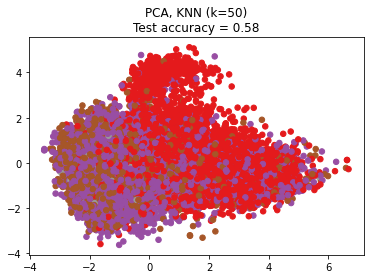

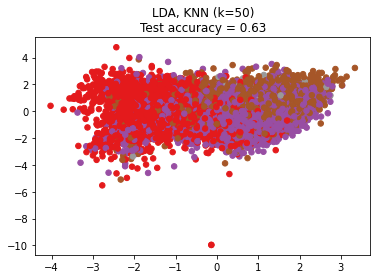

In [54]:
# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X_test)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_test['popularity_cut'], s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name, n_neighbors, acc_knn))
plt.show()